In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

dataset=pd.read_excel("Train_dataset.xlsx")
dataset.head(10)

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204
5,Chennai,Tamil Nadu,MPUA,4681087.0,4343645.0,904.0,26.0,31.0,HIGH,210.0,179.0,0.536995,4231703.0,67.0,4684707.0,145606
6,Chennai,Tamil nadu,T,4646732.0,NaN,912.0,26.0,30.0,MEDIUM,145.0,177.0,0.093451,4237820.0,55.0,4684707.0,145606
7,Kolkata,West Bengal,MPUA,4486679.0,4572876.0,945.0,26.0,37.0,NaN,NaN,NaN,0.473585,4239912.0,82.0,1489500.0,44957
8,Surat,Gujarat,MPUA,4467797.0,2433835.0,NaN,27.0,26.0,NaN,NaN,NaN,0.809334,3797627.0,98.0,284973.0,23432
9,Pune,Maharashtra,MPUA,3124458.0,2538473.0,NaN,29.0,29.0,NaN,NaN,NaN,0.445902,2743274.0,50.0,4408916.0,218502


In [9]:
dataset.drop("City",axis=1,inplace=True)
dataset.drop("State",axis=1,inplace=True)
dataset.drop("Type",axis=1,inplace=True)
dataset.drop("Popuation [2001]",axis=1,inplace=True)

In [10]:
dataset.shape

(787, 12)

In [11]:
dataset.isnull().sum()

Population [2011]     48
Sex Ratio             10
Median Age            18
Avg Temp              17
SWM                    4
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

In [12]:
dataset.fillna(axis=0,method='ffill',inplace=True)
dataset.isnull().sum()

Population [2011]    0
Sex Ratio            0
Median Age           0
Avg Temp             0
SWM                  0
Toilets Avl          0
Water Purity         0
H Index              0
Female Population    0
# of hospitals       0
Foreign Visitors     0
Covid Cases          0
dtype: int64

In [13]:
SWM = pd.get_dummies(dataset['SWM'],drop_first=True)
SWM.head(5)

,LOW,MEDIUM
0,0,1
1,0,1
2,0,0
3,0,1
4,1,0


In [14]:
dataset=pd.concat([dataset,SWM],axis=1)
dataset.head(5)

,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases,LOW,MEDIUM
0,12442373.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115,0,1
1,11007835.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188,0,1
2,8436675.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000,0,0
3,6809970.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123,0,1
4,5570585.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204,1,0


In [15]:
dataset.drop("SWM",axis=1,inplace=True)
dataset.shape

(787, 13)

In [16]:
dataset.head(5)

,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases,LOW,MEDIUM
0,12442373.0,878.0,23.0,32.0,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115,0,1
1,11007835.0,858.0,27.0,30.0,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188,0,1
2,8436675.0,936.0,28.0,37.0,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000,0,0
3,6809970.0,930.0,23.0,31.0,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123,0,1
4,5570585.0,852.0,29.0,25.0,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204,1,0


In [17]:
X=dataset.drop('Covid Cases',axis=1)
y=dataset['Covid Cases']

In [18]:
testdata=pd.read_excel("Test_dataset.xlsx")
testdata.head(10)

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,Tuensang,Nagaland,T.C,36774.0,NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,Lakshmeshwar,Karnataka,T.M.C,36754.0,NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,Zira,Punjab,M.Cl.,36732.0,NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,Yawal,Maharashtra,M.Cl,36706.0,NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,Thana Bhawan,Uttar Pradesh,N.P.,36669.0,NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0
5,Ramdurg,Karnataka,UA,36649.0,NaN,942.0,27.0,28.0,MEDIUM,92.0,185.0,0.571883,34523.0,30.0,636502.0
6,Pulgaon,Maharashtra,M.Cl,36522.0,NaN,887.0,26.0,31.0,MEDIUM,72.0,108.0,0.271195,32395.0,11.0,4408916.0
7,Sadasivpet,Telangana,M,36334.0,NaN,921.0,27.0,40.0,LOW,70.0,116.0,0.494227,33464.0,17.0,126078.0
8,Nargund,Karnataka,T.M.C,36291.0,NaN,940.0,23.0,37.0,LOW,77.0,148.0,0.708562,34114.0,21.0,636502.0
9,Neem-Ka-Thana,Rajasthan,M,36231.0,NaN,850.0,25.0,25.0,MEDIUM,61.0,148.0,0.592325,30796.0,29.0,1475311.0


In [19]:
testdata.drop("City",axis=1,inplace=True)
testdata.drop("State",axis=1,inplace=True)
testdata.drop("Type",axis=1,inplace=True)
testdata.drop("Popuation [2001]",axis=1,inplace=True)
testdata.shape

(501, 11)

In [20]:
testdata.isnull().sum()

Population [2011]     6
Sex Ratio             5
Median Age           13
Avg Temp             14
SWM                   9
Toilets Avl          22
Water Purity         19
H Index              15
Female Population    15
# of hospitals       17
Foreign Visitors     17
dtype: int64

In [21]:
testdata.fillna(axis=0,method='ffill',inplace=True)
dataset.isnull().sum()

Population [2011]    0
Sex Ratio            0
Median Age           0
Avg Temp             0
Toilets Avl          0
Water Purity         0
H Index              0
Female Population    0
# of hospitals       0
Foreign Visitors     0
Covid Cases          0
LOW                  0
MEDIUM               0
dtype: int64

In [22]:
SWM = pd.get_dummies(testdata['SWM'],drop_first=True)
SWM.head(5)

,LOW,MEDIUM
0,0,1
1,0,0
2,0,0
3,0,0
4,1,0


In [23]:
testdata=pd.concat([testdata,SWM],axis=1)
testdata.head(5)

,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,LOW,MEDIUM
0,36774.0,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0,0,1
1,36754.0,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0,0,0
2,36732.0,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0,0,0
3,36706.0,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0,0,0
4,36669.0,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0,1,0


In [24]:
testdata.drop("SWM",axis=1,inplace=True)
testdata.shape

(501, 12)

In [25]:
from sklearn import linear_model

In [26]:
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
reg.predict(X.head(15))

array([154467.86872996, 128046.10595745, 123702.07784436,  97855.56871379,
        62377.01712332,  69571.36224612,  69727.97088483,  70335.55957784,
        51955.01065344,  45888.35564395,  38026.8162825 ,  38394.56870747,
        38536.00347258,  34587.11651826,  33418.44525017])

In [30]:
y.head(15)

0     163115
1      80188
2     141000
3      55123
4      33204
5     145606
6     145606
7      44957
8      23432
9     218502
10     14001
11     37220
12     15764
13     22413
14     44700
Name: Covid Cases, dtype: int64

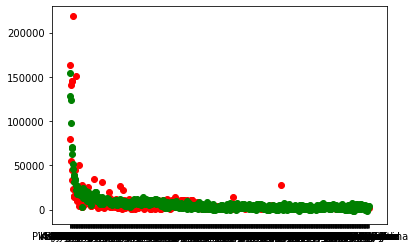

In [31]:
train_data=pd.read_excel("Train_dataset.xlsx")
plt.scatter(train_data.City,y,color='red')
plt.scatter(train_data.City,reg.predict(X),color='green')
plt.show()

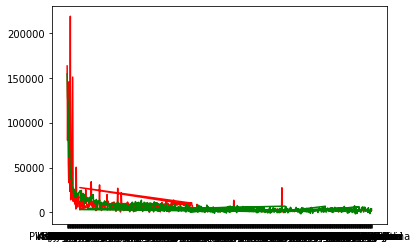

In [38]:
plt.plot(train_data.City,y,color='red')
plt.plot(train_data.City,reg.predict(X),color='green')
plt.show()

In [42]:
Covid_Cases = reg.predict(testdata)

In [43]:
Covid_Cases[0:20]

array([1619.35555597, 1834.06257817, -816.36718557, 5379.57973352,
       3599.51979757, 4109.25911377, 4064.17435874, -517.34426413,
        662.717797  , 1090.53231356, 3980.47597928, 3165.18585289,
       2288.43614465, 2290.57738189, 3631.51388991, 4140.6520504 ,
       -936.13136287, 1273.45067772, 2269.56959573,  944.91532743])

In [44]:
Covid_Cases = np.where(Covid_Cases < 0, 0, Covid_Cases)
Covid_Cases[0:20]

array([1619.35555597, 1834.06257817,    0.        , 5379.57973352,
       3599.51979757, 4109.25911377, 4064.17435874,    0.        ,
        662.717797  , 1090.53231356, 3980.47597928, 3165.18585289,
       2288.43614465, 2290.57738189, 3631.51388991, 4140.6520504 ,
          0.        , 1273.45067772, 2269.56959573,  944.91532743])

In [45]:
Covid_Cases = np.round(Covid_Cases,decimals=0)
Covid_Cases[0:20]

array([1619., 1834.,    0., 5380., 3600., 4109., 4064.,    0.,  663.,
       1091., 3980., 3165., 2288., 2291., 3632., 4141.,    0., 1273.,
       2270.,  945.])

In [46]:
testdata1=pd.read_excel("Test_dataset.xlsx")

In [47]:
Covid_Cases = pd.DataFrame(Covid_Cases)

In [56]:
predict_data = pd.concat([testdata1.City,Covid_Cases], axis=1)
predict_data.head(5)

,City,0
0,Tuensang,1619.0
1,Lakshmeshwar,1834.0
2,Zira,0.0
3,Yawal,5380.0
4,Thana Bhawan,3600.0


In [57]:
predict_data.rename(columns = {0:'Covid_Cases'}, inplace = True)
predict_data.head(5)

,City,Covid_Cases
0,Tuensang,1619.0
1,Lakshmeshwar,1834.0
2,Zira,0.0
3,Yawal,5380.0
4,Thana Bhawan,3600.0


In [51]:
predict_data.shape

(501, 2)

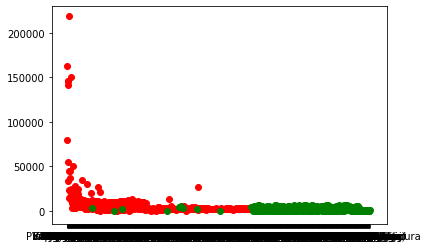

In [62]:
plt.scatter(train_data.City,y,color='red')
plt.scatter(predict_data.City,predict_data.Covid_Cases,color='green')
plt.show()

In [63]:
predict_data.to_excel("predict_out.xlsx")